### Import libraries

In [87]:
import sys
import os
import gc
from functools import partial
import warnings
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [92]:
from EmbedCarPrice import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
EmbedCarPrice.set_gpu_limit(6)

### Split none onehot encoded data into train and test for categorical embedding

In [5]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_data_merged.csv")

### We will embed columns model, transmission, and fuelType

--- 

### Garbage collect

In [6]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


### Setting up some constants for base model

In [108]:
EMBED_COLS = ["model","transmission","fuelType"]
BATCH_SIZE = 256 
MAX_EPOCH = 1000
lr = 1e-3
numeric_size = [64,32]
model_size = [1024,512,256]
DROPOUT= [0.2,0.2]
METRICS = ["MAPE","MAE"]

In [8]:
earlystop = tfk.callbacks.EarlyStopping(monitor="val_loss",mode="min",
                                        patience=10,verbose=1,restore_best_weights=True)

### train, dev, and test data for NN

* model embed model input 
* transmission embed model input
* fuelType embed model input 
* numeric input data 

In [9]:
carPrice_embed = EmbedCarPrice(data,BATCH_SIZE,MAX_EPOCH,[earlystop])

In [10]:
X_train,X_test,y_train,y_test,X_dev,y_dev = carPrice_embed.data_split(1988,0.1)

In [11]:
base_embed_model = EmbedCarPrice.embed_model_setup(EMBED_COLS,X_train,numeric_size,model_size,DROPOUT,METRICS,lr)

In [12]:
base_embed_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 4)]          0                                            
______________________________________________________________________________________________

In [13]:
carPrice_embed.set_base_model(base_embed_model)
carPrice_embed.cate_embed_process(X_train,y_train,X_dev,y_dev,X_test,y_test,EMBED_COLS)

In [16]:
carPrice_embed.regression_metrics(carPrice_embed._train_list[0],y_train,carPrice_embed._test_list,y_test,retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.934519,2519.856105,746.863498
test,0.922974,2796.442639,214.109778


In [ ]:
# base_embed_model_trained = carPrice_embed.trained_model

In [ ]:
# EmbedCarPrice.save_model(base_embed_model_trained,"cate_embed_base_model.h5")

In [14]:
base_embed_model = EmbedCarPrice.load_model("cate_embed_base_model.h5")

In [15]:
carPrice_embed.reset_trained_model(base_embed_model)

In [ ]:
# carPrice_embed.plot_metrics("loss")

In [ ]:
# carPrice_embed.plot_metrics("MAPE")

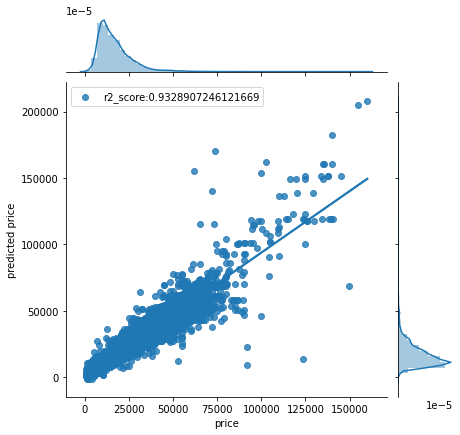

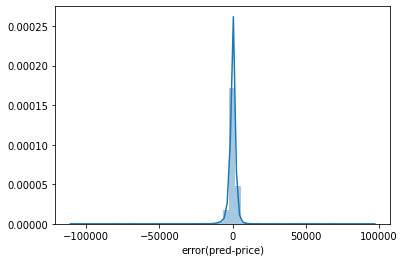

In [17]:
carPrice_embed.plot_pred_price

In [18]:
price_table = carPrice_embed.price_diff

In [19]:
price_table.head(20)

,model,transmission,fuelType,binned_year,mil_cat,binned_mpg,engine_binned,price_diff_pct,price_diff_abs
39978,A Class,Manual,Petrol,1,5,1,0,794.956656,794.956656
11984,Golf,Manual,Diesel,1,0,3,0,746.863498,746.863498
20061,Beetle,Automatic,Petrol,1,0,1,0,585.205621,585.205621
39711,C Class,Automatic,Diesel,1,2,1,1,556.821436,556.821436
44539,Corsa,Manual,Petrol,1,4,3,0,534.810951,534.810951
71819,Mondeo,Manual,Diesel,1,0,2,0,515.574593,515.574593
77582,Santa Fe,Manual,Petrol,1,4,1,1,470.236410,470.236410
39540,M Class,Semi-Auto,Petrol,1,5,1,1,425.457149,425.457149
40171,A Class,Automatic,Petrol,1,4,2,0,373.972656,373.972656
69135,Mondeo,Manual,Diesel,1,4,2,0,315.254883,315.254883


### Similar to other models, cars that are old with high mileage tend to be over predicted by the model 

### Let's try a bigger model and see if it helps and increase embed size with slower learning rate 

In [20]:
EMBED_COLS = ["model","transmission","fuelType"]
BATCH_SIZE = 256 
MAX_EPOCH = 1000
lr = 5e-4
numeric_size = [128,64]
model_size = [1024,512,256]
DROPOUT= [0.1,0.1]
METRICS = ["MAPE","MAE"]

In [21]:
bigger_embed_model = EmbedCarPrice.embed_model_setup(EMBED_COLS,X_train,numeric_size,model_size,DROPOUT,METRICS,lr,1.5)

In [22]:
bigger_embed_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 4)]          0                                            
____________________________________________________________________________________________

In [23]:
carPrice_embed_bigger = EmbedCarPrice(data,BATCH_SIZE,MAX_EPOCH,[earlystop])

In [24]:
carPrice_embed_bigger.set_base_model(bigger_embed_model)
carPrice_embed_bigger.cate_embed_process(X_train,y_train,X_dev,y_dev,X_test,y_test,EMBED_COLS)

In [27]:
carPrice_embed_bigger.regression_metrics(carPrice_embed_bigger._train_list,y_train,carPrice_embed_bigger._test_list,
                                  y_test,retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.939821,2415.680098,793.600800
test,0.933446,2599.390921,256.823311


In [28]:
bigger_embed = carPrice_embed_bigger.trained_model

In [29]:
EmbedCarPrice.save_model(bigger_embed,"bigger_embed.h5")

In [30]:
bigger_embed = EmbedCarPrice.load_model("bigger_embed.h5")

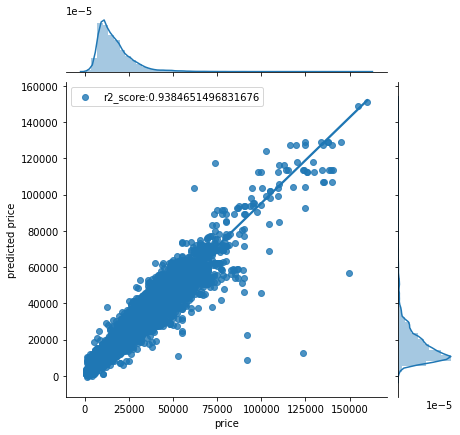

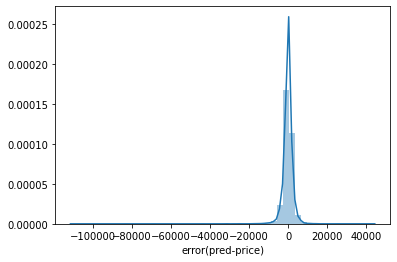

In [31]:
carPrice_embed_bigger.plot_pred_price

In [32]:
price_table = carPrice_embed_bigger.price_diff

In [33]:
price_table.head(20)

,model,transmission,fuelType,binned_year,mil_cat,binned_mpg,engine_binned,price_diff_pct,price_diff_abs
20061,Beetle,Automatic,Petrol,1,0,1,0,793.600800,793.600800
11984,Golf,Manual,Diesel,1,0,3,0,712.023898,712.023898
39711,C Class,Automatic,Diesel,1,2,1,1,594.681098,594.681098
71819,Mondeo,Manual,Diesel,1,0,2,0,580.404097,580.404097
77582,Santa Fe,Manual,Petrol,1,4,1,1,479.667562,479.667562
69135,Mondeo,Manual,Diesel,1,4,2,0,442.220595,442.220595
39978,A Class,Manual,Petrol,1,5,1,0,428.790678,428.790678
44539,Corsa,Manual,Petrol,1,4,3,0,415.699229,415.699229
39540,M Class,Semi-Auto,Petrol,1,5,1,1,402.148829,402.148829
71617,Fiesta,Manual,Petrol,1,4,2,0,318.660540,318.660540


### Performance is slightly better but still have bin year and mil category issues. 

### Try embed other binned numerical features and see if the performance improves 

In [34]:
EMBED_COLS = ["model","transmission","fuelType","binned_year","mil_cat","binned_mpg","engine_binned"]
BATCH_SIZE = 256 
MAX_EPOCH = 1000
lr = 5e-4
numeric_size = [128,64]
model_size = [1024,512,256]
DROPOUT= [0.1,0.1]
METRICS = ["MAPE","MAE"]

In [35]:
all_embed_model = EmbedCarPrice.embed_model_setup(EMBED_COLS,X_train,numeric_size,model_size,DROPOUT,METRICS,lr,2)

In [36]:
carPrice_embed_all = EmbedCarPrice(data,BATCH_SIZE,MAX_EPOCH,[earlystop])

In [37]:
carPrice_embed_all.set_base_model(all_embed_model)
carPrice_embed_all.cate_embed_process(X_train,y_train,X_dev,y_dev,X_test,y_test,EMBED_COLS)

In [42]:
carPrice_embed_all.regression_metrics(carPrice_embed_all._train_list[0], y_train,
                                      carPrice_embed_all._test_list,y_test,
                                      retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.941081,2390.262664,491.193910
test,0.933194,2604.307723,246.534559


In [39]:
all_embed = carPrice_embed_all.trained_model

In [40]:
EmbedCarPrice.save_model(all_embed,"All_embed.h5")

In [41]:
all_embed = EmbedCarPrice.load_model("All_embed.h5")

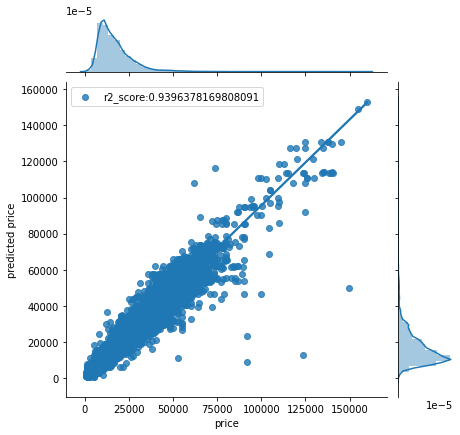

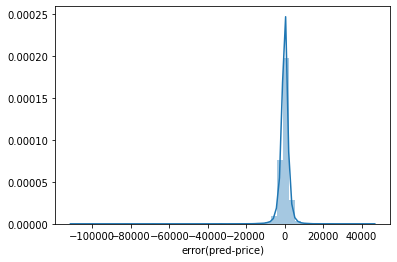

In [43]:
carPrice_embed_all.plot_pred_price

In [44]:
price_table = carPrice_embed_all.price_diff
price_table.head(20)

,model,transmission,fuelType,binned_year,mil_cat,binned_mpg,engine_binned,price_diff_pct,price_diff_abs
11984,Golf,Manual,Diesel,1,0,3,0,491.193910,491.193910
20061,Beetle,Automatic,Petrol,1,0,1,0,482.320906,482.320906
44539,Corsa,Manual,Petrol,1,4,3,0,429.793442,429.793442
71819,Mondeo,Manual,Diesel,1,0,2,0,417.313348,417.313348
39711,C Class,Automatic,Diesel,1,2,1,1,412.315074,412.315074
87481,3 Series,Automatic,Petrol,0,4,1,1,409.452962,409.452962
69135,Mondeo,Manual,Diesel,1,4,2,0,389.173647,389.173647
77582,Santa Fe,Manual,Petrol,1,4,1,1,379.552653,379.552653
71617,Fiesta,Manual,Petrol,1,4,2,0,310.709471,310.709471
47201,Astra,Manual,Petrol,1,5,2,0,307.063612,307.063612


### Slightly improved, still have same issues with older year. Let's import original raw data

In [45]:
data_raw = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_data_raw.csv").drop("brand",axis=1)

In [46]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99186 entries, 0 to 99185
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99186 non-null  object 
 1   year          99186 non-null  int64  
 2   price         99186 non-null  int64  
 3   transmission  99186 non-null  object 
 4   mileage       99186 non-null  int64  
 5   fuelType      99186 non-null  object 
 6   mpg           99186 non-null  float64
 7   engineSize    99186 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.1+ MB


In [47]:
EMBED_COLS = ["model","transmission","fuelType","year"]
BATCH_SIZE = 256 
MAX_EPOCH = 1000
lr = 5e-4
numeric_size = [128]
model_size = [1024,512,256]
DROPOUT= [0.1,0.1]
METRICS = ["MAPE","MAE"]

In [49]:
carPrice_embed_raw = EmbedCarPrice(data_raw,BATCH_SIZE,MAX_EPOCH,[earlystop])

In [53]:
X_train_r,X_test_r,y_train_r,y_test_r,X_dev_r,y_dev_r  = carPrice_embed_raw.data_split(1988,0.1)

In [54]:
raw_embed_model = EmbedCarPrice.embed_model_setup(EMBED_COLS,X_train_r,numeric_size,model_size,DROPOUT,METRICS,lr,2)

In [60]:
carPrice_embed_raw.set_base_model(raw_embed_model)
carPrice_embed_raw.cate_embed_process(X_train_r,y_train_r,X_dev_r,y_dev_r,X_test_r,y_test_r,EMBED_COLS)

In [69]:
carPrice_embed_raw.regression_metrics(carPrice_embed_raw._train_list[0],y_train_r,
                                  carPrice_embed_raw._test_list,y_test_r,
                                  retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.921495,2759.079305,676.094742
test,0.909136,3037.257711,693.037751


In [64]:
embed_model_r = carPrice_embed_raw.trained_model

In [65]:
EmbedCarPrice.save_model(embed_model_r,"model_embed_raw.h5")

In [66]:
embed_model_r = EmbedCarPrice.load_model("model_embed_raw.h5")

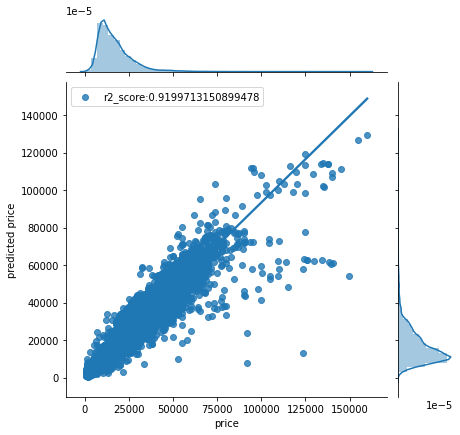

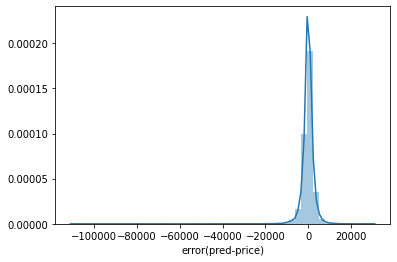

In [67]:
carPrice_embed_raw.plot_pred_price

In [68]:
price_table = carPrice_embed_raw.price_diff
price_table.head(20)

,model,year,transmission,mileage,fuelType,mpg,engineSize,price_diff_pct,price_diff_abs
72016,Focus,2003,Manual,177644,Petrol,41.5,1.6,693.037751,693.037751
11984,Golf,2008,Manual,1,Diesel,53.3,1.9,676.094742,676.094742
39978,A Class,2003,Manual,109090,Petrol,40.0,1.4,586.948167,586.948167
71819,Mondeo,2008,Manual,1,Diesel,47.9,2.0,512.131440,512.131440
27964,Octavia,2010,Manual,300000,Diesel,57.6,1.9,421.157883,421.157883
39336,S Class,2001,Automatic,108800,Diesel,31.7,3.2,391.225975,391.225975
6427,Avensis,2003,Manual,167054,Diesel,48.7,2.0,377.015596,377.015596
52100,Zafira,2013,Manual,279000,Diesel,55.4,1.7,362.989366,362.989366
40170,A Class,2010,Manual,116126,Diesel,54.3,2.0,353.583008,353.583008
83274,Z4,2014,Manual,31074,Petrol,41.5,2.0,345.089630,345.089630


### Let's use numeric binned data instead

In [70]:
combined = data.drop("binned_year",axis=1).merge(data_raw["year"],left_index=True,right_index=True)

In [111]:
EMBED_COLS = ["model","transmission","fuelType","year","mil_cat","binned_mpg","engine_binned"]
BATCH_SIZE = 256 
MAX_EPOCH = 1000
lr = 5e-4
numeric_size = [128,64]
model_size = [1024,512,256]
DROPOUT= [0.1,0.1]
METRICS = ["MAPE","MAE"]

In [73]:
carPrice_embed_c = EmbedCarPrice(combined,BATCH_SIZE,MAX_EPOCH,[earlystop])

In [74]:
X_train_c,X_test_c,y_train_c,y_test_c,X_dev_c,y_dev_c  = carPrice_embed_c.data_split(1988,0.1)

In [75]:
embed_model_c = EmbedCarPrice.embed_model_setup(EMBED_COLS,X_train_c,numeric_size,model_size,DROPOUT,METRICS,lr,2)

In [76]:
embed_model_c.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_31 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_33 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

In [77]:
carPrice_embed_c.set_base_model(embed_model_c)
carPrice_embed_c.cate_embed_process(X_train_c,y_train_c,X_dev_c,y_dev_c,X_test_c,y_test_c,EMBED_COLS)

In [84]:
carPrice_embed_c.regression_metrics(carPrice_embed_c._train_list,y_train_c,
                                    carPrice_embed_c._test_list,y_test_c,retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.952892,2137.300861,480.879523
test,0.943111,2403.264800,217.666755


In [79]:
embed_model_c = carPrice_embed_c.trained_model

In [80]:
EmbedCarPrice.save_model(embed_model_c,"combined_embed_all.h5")

In [81]:
embed_model_c= EmbedCarPrice.load_model("combined_embed_all.h5")

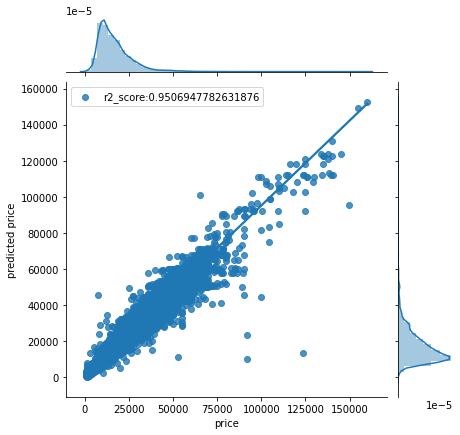

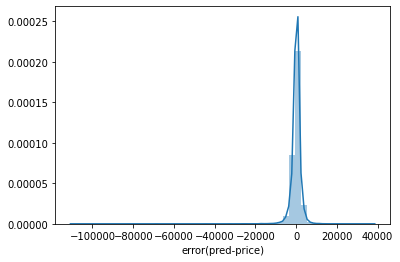

In [82]:
carPrice_embed_c.plot_pred_price

In [83]:
price_table = carPrice_embed_c.price_diff
price_table.head(20)

,model,transmission,fuelType,mil_cat,binned_mpg,engine_binned,year,price_diff_pct,price_diff_abs
72229,Kuga,Manual,Petrol,3,1,1,2011,506.047838,506.047838
71819,Mondeo,Manual,Diesel,0,2,0,2008,480.879523,480.879523
11984,Golf,Manual,Diesel,0,3,0,2008,416.898591,416.898591
71617,Fiesta,Manual,Petrol,4,2,0,2008,389.379425,389.379425
83274,Z4,Manual,Petrol,3,2,0,2014,328.613059,328.613059
77582,Santa Fe,Manual,Petrol,4,1,1,2002,319.810628,319.810628
87481,3 Series,Automatic,Petrol,4,1,1,1999,309.838135,309.838135
69135,Mondeo,Manual,Diesel,4,2,0,2005,271.877857,271.877857
39711,C Class,Automatic,Diesel,2,1,1,2002,271.066413,271.066413
20061,Beetle,Automatic,Petrol,0,1,0,2001,269.269267,269.269267


### The binned numeric value did better than original numerica data. 

--- 

### Let's focus on binned numeric value with original year embed model and adjust learning rate first 

2511/2511 [==============================] - 9s 3ms/step - loss: 378606336.0000 - MAPE: 100.0000 - MAE: 16782.0293 - val_loss: 384747424.0000 - val_MAPE: 99.9943 - val_MAE: 16988.9277


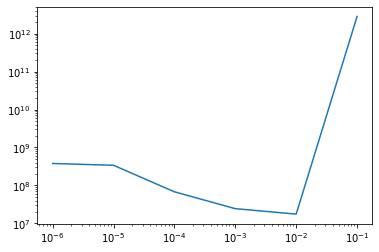

In [95]:
learning_rates = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
mdl_setup = partial(EmbedCarPrice.embed_model_setup, EMBED_COLS,X_train_c,numeric_size,model_size,DROPOUT,METRICS,embed_size_multiplier=4.0)
carPrice_embed_c.param_search(learning_rates,mdl_setup,1)

### learning rate of 0.001 seems to work the best

### tune embed multiplier

In [100]:
mdl_partial = partial(EmbedCarPrice.embed_model_setup, EMBED_COLS,X_train_c,numeric_size,model_size,DROPOUT,METRICS,0.001)

2511/2511 [==============================] - 9s 3ms/step - loss: 23780898.0000 - MAPE: 18.5887 - MAE: 2761.4470 - val_loss: 12196392.0000 - val_MAPE: 15.6310 - val_MAE: 2344.3984


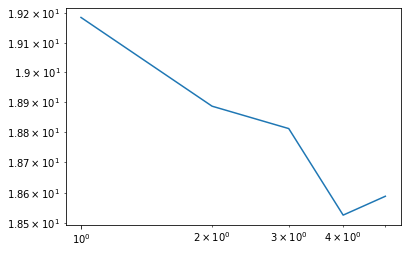

In [102]:
multiplier = [1,2,3,4,5]
carPrice_embed_c.param_search(multiplier,mdl_partial,1,optimizer="MAPE")

### multipler of 3 seems to work the best

In [103]:
final_mdl = mdl_partial(3)

In [104]:
final_mdl.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_170 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_171 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_172 (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_173 (InputLayer)          [(None, 1)]          0                                            
___________________________________________________________________________________________

In [129]:
carPrice_embed_c.set_base_model(final_mdl)
carPrice_embed_c.regression_metrics(carPrice_embed_c._train_list,y_train_c,
                                    carPrice_embed_c._test_list,y_test_c,retrain=False)

,r2_score,rmse,price_diff_abs_max
train,0.953888,2114.578694,376.216418
test,0.943207,2401.223337,213.027545


In [124]:
final_mdl = carPrice_embed_c.trained_model

In [125]:
EmbedCarPrice.save_model(final_mdl,"final_embed_mdl.h5")

In [126]:
EmbedCarPrice.load_model("final_embed_mdl.h5")

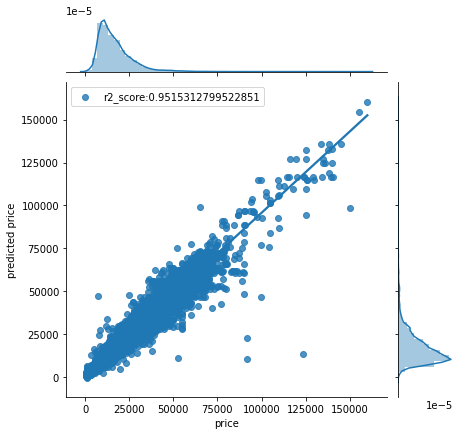

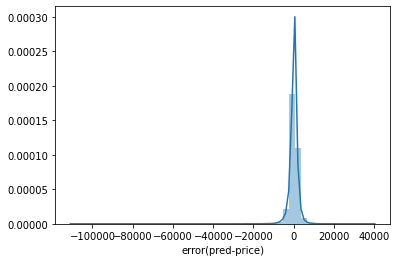

In [127]:
carPrice_embed_c.plot_pred_price

In [128]:
price_table = carPrice_embed_c.price_diff
price_table.head(20)

,model,transmission,fuelType,mil_cat,binned_mpg,engine_binned,year,price_diff_pct,price_diff_abs
72229,Kuga,Manual,Petrol,3,1,1,2011,528.374773,528.374773
11984,Golf,Manual,Diesel,0,3,0,2008,376.216418,376.216418
71819,Mondeo,Manual,Diesel,0,2,0,2008,350.454150,350.454150
83274,Z4,Manual,Petrol,3,2,0,2014,320.912978,320.912978
77582,Santa Fe,Manual,Petrol,4,1,1,2002,303.054077,303.054077
71617,Fiesta,Manual,Petrol,4,2,0,2008,291.526210,291.526210
69135,Mondeo,Manual,Diesel,4,2,0,2005,251.513491,251.513491
39978,A Class,Manual,Petrol,5,1,0,2003,251.150316,251.150316
87481,3 Series,Automatic,Petrol,4,1,1,1999,239.378682,239.378682
39711,C Class,Automatic,Diesel,2,1,1,2002,227.305210,227.305210


### Conclusions

### More tuning on dropout and other params can enhance the models but embed gives the best results